In [1]:
import gensim.downloader as api
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Load GloVe embeddings (Twitter, 50 dimensions)
wv = api.load('glove-twitter-50')

# Given words
words = ['dog', 'bark', 'tree', 'bank', 'river', 'money']

# Get word vectors (skip words not in vocabulary)
word_vectors = []
valid_words = []
for word in words:
    if word in wv:
        word_vectors.append(wv[word])
        valid_words.append(word)
    else:
        print(f"'{word}' not found in vocabulary.")

# Compute cosine similarity matrix
cos_sim_matrix = cosine_similarity(word_vectors)

# Print results
print("Words used:", valid_words)
print("\nCosine Similarity Matrix (GloVe-Twitter-50D):")
print(np.round(cos_sim_matrix, 2))


Words used: ['dog', 'bark', 'tree', 'bank', 'river', 'money']

Cosine Similarity Matrix (GloVe-Twitter-50D):
[[1.   0.59 0.71 0.35 0.4  0.58]
 [0.59 1.   0.55 0.04 0.27 0.29]
 [0.71 0.55 1.   0.35 0.49 0.51]
 [0.35 0.04 0.35 1.   0.32 0.67]
 [0.4  0.27 0.49 0.32 1.   0.34]
 [0.58 0.29 0.51 0.67 0.34 1.  ]]


In [2]:
from gensim.models import FastText
from gensim.test.utils import common_texts
print("\nTraining FastText embeddings...")
fasttext_model = FastText(
    vector_size=50, window=5, min_count=1, sentences=common_texts, epochs=10
)

# Get word vectors for FastText (skip words not in vocabulary)
word_vectors_fasttext = []
valid_words_fasttext = []
for word in words:
    if word in fasttext_model.wv:
        word_vectors_fasttext.append(fasttext_model.wv[word])
        valid_words_fasttext.append(word)
    else:
        print(f"'{word}' not found in FastText vocabulary.")

# Compute cosine similarity matrix for FastText
cos_sim_matrix_fasttext = cosine_similarity(word_vectors_fasttext)

# Print results for FastText
print("\nWords used (FastText):", valid_words_fasttext)
print("\nCosine Similarity Matrix (FastText):")
print(np.round(cos_sim_matrix_fasttext, 2))


Training FastText embeddings...

Words used (FastText): ['dog', 'bark', 'tree', 'bank', 'river', 'money']

Cosine Similarity Matrix (FastText):
[[ 1.    0.11 -0.17  0.03 -0.01 -0.11]
 [ 0.11  1.    0.21  0.17  0.09 -0.05]
 [-0.17  0.21  1.    0.04  0.07 -0.26]
 [ 0.03  0.17  0.04  1.    0.2  -0.02]
 [-0.01  0.09  0.07  0.2   1.   -0.12]
 [-0.11 -0.05 -0.26 -0.02 -0.12  1.  ]]


GloVe captures better semantics because it is pre-trained on a large Twitter dataset, allowing it to learn co-occurrence patterns between words effectively. It correctly identifies strong associations like 'bank' with 'money' and 'dog' with 'bark', which are key indicators of good semantic representation. In contrast, FastText, trained on a small dataset, struggles to establish meaningful relationships, resulting in weak or even negative similarity scores. Therefore, GloVe provides a more accurate representation of word meanings in this case.

In [3]:
# Importing necessary libraries
import nltk                                  # Python library for NLP
from nltk.corpus import twitter_samples      # sample Twitter dataset from NLTK
import matplotlib.pyplot as plt              # visualization library
import numpy as np                           # library for scientific computing and matrix operations

# downloads sample twitter dataset.
nltk.download('twitter_samples')
# select the set of positive and negative tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

# concatenate the lists, 1st part is the positive tweets followed by the negative
tweets = all_positive_tweets + all_negative_tweets

# make a numpy array representing labels of the tweets
labels = np.append(np.ones((len(all_positive_tweets))), np.zeros((len(all_negative_tweets))))

[nltk_data] Downloading package twitter_samples to
[nltk_data]     /Users/jacobmartin/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


In [4]:
# Printing first 5 positive tweets
print("First 5 Positive Tweets:")
for tweet in all_positive_tweets[:5]:
    print(tweet)

# Printing frist 5 negative tweets
print("\nFirst 5 Negative Tweets:")
for tweet in all_negative_tweets[:5]:
    print(tweet)

First 5 Positive Tweets:
#FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)
@Lamb2ja Hey James! How odd :/ Please call our Contact Centre on 02392441234 and we will be able to assist you :) Many thanks!
@DespiteOfficial we had a listen last night :) As You Bleed is an amazing track. When are you in Scotland?!
@97sides CONGRATS :)
yeaaaah yippppy!!!  my accnt verified rqst has succeed got a blue tick mark on my fb profile :) in 15 days

First 5 Negative Tweets:
hopeless for tmr :(
Everything in the kids section of IKEA is so cute. Shame I'm nearly 19 in 2 months :(
@Hegelbon That heart sliding into the waste basket. :(
“@ketchBurning: I hate Japanese call him "bani" :( :(”

Me too
Dang starting next week I have "work" :(


In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(tweets, labels, test_size=0.3, random_state=42)

from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the vectorizer for n-grams from 1 to 4
vectorizer = TfidfVectorizer(ngram_range=(1,4), stop_words='english')

# Fit and transform the training data; transform the testing data
X_train_ngrams = vectorizer.fit_transform(X_train)
X_test_ngrams = vectorizer.transform(X_test)


In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_ngrams, y_train)

# Predict on the test set
y_pred = model.predict(X_test_ngrams)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print(classification_report(y_test, y_pred))


Accuracy: 0.7477
              precision    recall  f1-score   support

         0.0       0.72      0.78      0.75      1463
         1.0       0.78      0.72      0.74      1537

    accuracy                           0.75      3000
   macro avg       0.75      0.75      0.75      3000
weighted avg       0.75      0.75      0.75      3000



N-gram range (1, 1): Accuracy = 0.7457
N-gram range (2, 2): Accuracy = 0.6240
N-gram range (3, 3): Accuracy = 0.5403
N-gram range (4, 4): Accuracy = 0.5280


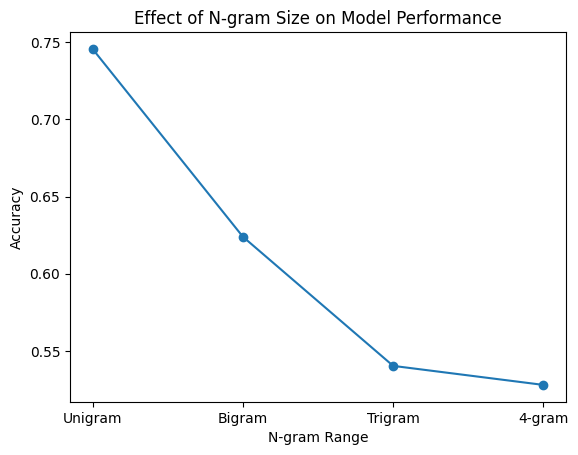

In [16]:
import matplotlib.pyplot as plt

# Define n-gram ranges to test
ngram_ranges = [(1, 1), (2, 2), (3, 3), (4, 4)]
accuracies = []

for ngram_range in ngram_ranges:
    # Vectorize with the current n-gram range
    vectorizer = TfidfVectorizer(ngram_range=ngram_range, stop_words='english')
    X_train_ngrams = vectorizer.fit_transform(X_train)
    X_test_ngrams = vectorizer.transform(X_test)

    # Train the model
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train_ngrams, y_train)

    # Predict and evaluate
    y_pred = model.predict(X_test_ngrams)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f'N-gram range {ngram_range}: Accuracy = {accuracy:.4f}')

# Plot the results
ngram_labels = ['Unigram', 'Bigram', 'Trigram', '4-gram']
plt.plot(ngram_labels, accuracies, marker='o')
plt.xlabel('N-gram Range')
plt.ylabel('Accuracy')
plt.title('Effect of N-gram Size on Model Performance')
plt.show()


N-gram range (1, 1): Accuracy = 0.7457
N-gram range (1, 2): Accuracy = 0.7487
N-gram range (1, 3): Accuracy = 0.7490
N-gram range (1, 4): Accuracy = 0.7477


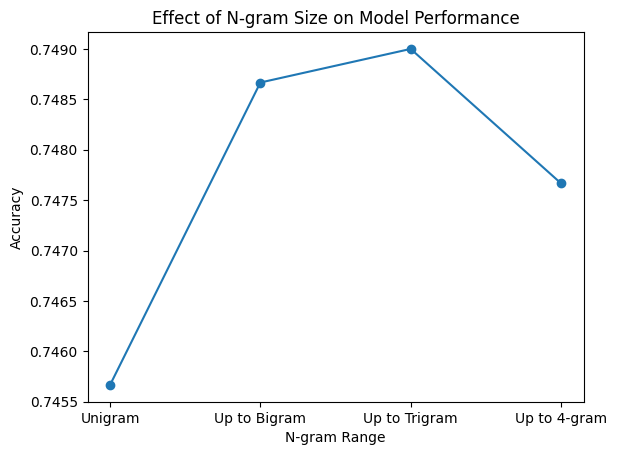

In [34]:
# Combined n-grams
import matplotlib.pyplot as plt

# Define n-gram ranges to test
ngram_ranges = [(1, 1), (1, 2), (1, 3), (1, 4)]
accuracies = []

for ngram_range in ngram_ranges:
    # Vectorize with the current n-gram range
    vectorizer = TfidfVectorizer(ngram_range=ngram_range, stop_words='english')
    X_train_ngrams = vectorizer.fit_transform(X_train)
    X_test_ngrams = vectorizer.transform(X_test)

    # Train the model
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train_ngrams, y_train)

    # Predict and evaluate
    y_pred = model.predict(X_test_ngrams)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f'N-gram range {ngram_range}: Accuracy = {accuracy:.4f}')

# Plot the results
ngram_labels = ['Unigram', 'Up to Bigram', 'Up to Trigram', 'Up to 4-gram']
plt.plot(ngram_labels, accuracies, marker='o')
plt.xlabel('N-gram Range')
plt.ylabel('Accuracy')
plt.title('Effect of N-gram Size on Model Performance')
plt.show()



---
Results

| N-gram Type | Accuracy |
|-------------|----------|
| Unigrams    | 0.7457   |
| Bigrams     | 0.6240   |
| Trigrams    | 0.5403   |
| 4-grams     | 0.5280   |

---

Unigrams are the most frequent and widely shared across tweets since tweets are shorter and many of the words carry clear sentiments on their own. Words like "great", "bad", "love", or "terrible" all are either positive and negative. This allows unigrams to generalize better.

When moving to higher n-grams, the accuracy drops by a large margin. This is likely because of the scarcity of certain phrases like "not good" or "very bad service". These higher n-grams are much harder to generalize for every tweet. There is also the risk of overfitting because of that. Longer phrases aren't repeated across tweets like singluar words, and thus are memorized by the model rather than generalized. 

However, when combined with unigrams up to n-grams, the accuracy is the same for all 4. (1, 4), (1, 2), (1, 3), (1, 4), allows the model to learn for all splits up to n. For this the accuracy is around the same if it were to just learn from unigrams: 75%. This is likely due to the model generalizing well with unigrams, which in turn help generalize higher n-grams. 

In conclusion, unigrams performs the best because it is simple and effective as it provides a soldi foundation for generalizing sentiments. Higher n-grams don't perform well unless combined with unigrams. 

In [ ]:
!pip install datasets evaluate
from huggingface_hub import notebook_login

from datasets import load_dataset

billsum = load_dataset("billsum", split="ca_test")

In [37]:
train_testvalid = billsum.train_test_split(test_size=0.2)  

# Access the train and test splits:
train_data = train_testvalid['train']
test_data = train_testvalid['test']

print(train_data[0])
print(test_data[0])
print(train_data)
print(test_data)

{'text': 'The people of the State of California do enact as follows:\n\n\nSECTION 1.\nSection 1941.7 is added to the Civil Code, to read:\n1941.7.\n(a) An obligation shall not arise under Section 1941 or 1942 to repair a dilapidation relating to the presence of mold pursuant to paragraph (13) of subdivision (a) of Section 17920.3 of the Health and Safety Code until the lessor has notice of the dilapidation or if the tenant is in violation of Section 1941.2.\n(b) A landlord may enter a dwelling unit to repair a dilapidation relating to the presence of mold pursuant to paragraph (13) of subdivision (a) of Section 17920.3 of the Health and Safety Code provided the landlord complies with the provisions of Section 1954.\nSEC. 2.\nSection 17920 of the Health and Safety Code is amended to read:\n17920.\nAs used in this part:\n(a) “Approved” means acceptable to the department.\n(b) “Building” means a structure subject to this part.\n(c) “Building standard” means building standard as defined in

In [54]:
import numpy as np
import pandas as pd

pre  = pd.DataFrame()
pre['text'] = train_data['text']
pre['summary'] = train_data['summary']
print(pre.head(2))

                                                text  \
0  The people of the State of California do enact...   
1  The people of the State of California do enact...   

                                             summary  
0  (1) Existing law requires the lessor of a buil...  
1  Existing law requires a petroleum refinery emp...  


In [57]:
# Daa Preprocessing

import re

def text_strip(column):
    for row in column:
        row = re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", row)
        row = row.lower()
        row = row.strip()
        row = re.sub(r" +", " ", row)
        yield row

quick_clean = text_strip(pre['text'])
quick_clean2 = text_strip(pre['summary'])
print(next(quick_clean))
print(next(quick_clean2))

the people of the state of california do enact as followssection 1section 19417 is added to the civil code to read19417a an obligation shall not arise under section 1941 or 1942 to repair a dilapidation relating to the presence of mold pursuant to paragraph 13 of subdivision a of section 179203 of the health and safety code until the lessor has notice of the dilapidation or if the tenant is in violation of section 19412b a landlord may enter a dwelling unit to repair a dilapidation relating to the presence of mold pursuant to paragraph 13 of subdivision a of section 179203 of the health and safety code provided the landlord complies with the provisions of section 1954sec 2section 17920 of the health and safety code is amended to read17920as used in this parta approved means acceptable to the departmentb building means a structure subject to this partc building standard means building standard as defined in section 18909d department means the department of housing and community developm

In [ ]:
from time import time
import spacy

# Load spaCy model with unnecessary components disabled
nlp = spacy.load('en_core_web_sm', disable=['ner', 'parser'])  # Disable NER and parsing for speed

t = time()
text = [str(doc) for doc in nlp.pipe(quick_clean, batch_size=5000,n_process=-1)]
print(f"Time to clean text: {round((time()-t)/60,2)} mins")

t = time()
summary = [str(doc) for doc in nlp.pipe(quick_clean2, batch_size=5000, n_process=-1)]
print(f"Time to clean summary: {round((time()-t)/60,2)} mins")
